# Linear Regression for Machine Learning

## Objective

Use linear regression for Machine Learning.

Select features for linear regression. (Feature Selection)

Clean and prepare features for linear regression. (Feature Engineering)

## Data Set

The dataset contains the data on sold houses in Ames, Iowa. Each row in the data set describes the properties of a single house as well as the amount it was sold for. We'll build models that predict the final sale price from its other other attributes. 

Specifically, exploring the following questions:

    •	Which properties of a house most affect the final sale price?
    •	How effectively can we predict the sale price from just its properties?
    
This dataset was originally compiled by [Dean De Cock](http://www.truman.edu/faculty-staff/decock/) for the primary purpose of having a high quality dataset for regression. The dataset can be downloaded from [here](https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt).

Here are some of the columns of the data set:

| Column          | Description                                         |
|-----------------|-----------------------------------------------------|
| Lot Area        | Lot size in square feet.                            |
| Overall Qual    | Rates the overall material and finish of the house. |
| Overall Cond    | Rates the overall condition of the house.           |
| Year Built      | Original construction date.                         |
| Low Qual Fin SF | Low quality finished square feet (all floors).      |
| Full Bath       | Full bathrooms above grade.                         |
| Fireplaces      | Number of fireplaces.                               |



## Reading In The Data

In [1]:
import pandas as pd
data = pd.read_csv('C:/Users/i7/csv/AmesHousing.txt', delimiter="\t")

## Generating Train and Test Datasets 

In [3]:
train = data[0:1460]
test = data[1460:]

print(train.info())
target = 'SalePrice'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Street             1460 non-null object
Alley              109 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         14

## Simple Linear Regression (Univariate Linear Regression)

Pick a feature that seems like it has the strongest correlation with the final sale price.

    -- Garage Area
    -- Gr Liv Area
    -- Overall Cond

Generating 3 scatter plots in the same column:

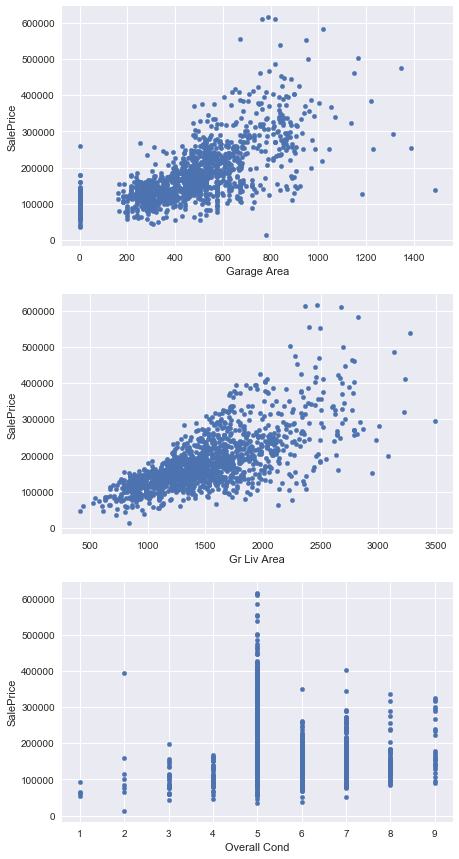

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.show()

##### GrLivArea feature correlates the most with the SalePrice column.

## Least Squares

In [12]:
train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.465366,-0.132401,0.662397
Gr Liv Area,0.465366,1.000000,-0.133710,0.698990
Overall Cond,-0.132401,-0.133710,1.000000,-0.099395
SalePrice,0.662397,0.698990,-0.099395,1.000000


The correlation between GrLivArea and SalePrice is around 0.698, which is the highest

### Understanding the model fitting criteria

### Residual Sum Of Squares

To find the optimal parameters for a linear regression model, we want to optimize the model's residual sum of squares (or RSS). Residual (often referred to as errors) describes the difference between the predicted values for the target column (y^) and the true values (y)

## Using Scikit-Learn To Train And Predict

Use scikit-learn to find optimal parameter values for the model

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
print(lr.coef_)
print(lr.intercept_)

a0 = lr.intercept_
a1 = lr.coef_

[ 116.86624683]
5366.82171006


#### Interpretation:

For every 1 square foot increase in above ground living area, we can expect the home's value to increase by approximately 116.87 dollars

## Making Predictions

Use the fitted model to make predictions on both the training and test sets.

In [14]:
import numpy as np

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])

from sklearn.metrics import mean_squared_error
train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])

train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)


56034.3620014
57088.2516126


## Multiple Linear Regression

train a model using the following columns from the dataset to see how train and test RMSE values are improved.

    •	Lot Area
    •	Gr Liv Area

In [15]:
cols = ['Overall Cond', 'Gr Liv Area']

lr.fit(train[cols], train['SalePrice'])
train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])

train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train['SalePrice']))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test['SalePrice']))

print(train_rmse_2)
print(test_rmse_2)

56032.3980153
57066.9077945


# FEATURE SELECTION

Use correlation between features and the target column, correlation between features, and variance of features to select features.

## Missing Values

In [19]:
house = pd.read_csv('C:/Users/i7/csv/AmesHousing.txt', delimiter="\t")

train = house[0:1460]
test = house[1460:]

numerical_train = train.select_dtypes(include=['int64', 'float64'])
numerical_train = numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1)

null_series = numerical_train.isnull().sum()
full_cols_series = null_series[null_series == 0]
print(full_cols_series)

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64


## Correlating Feature Columns With Target Column

Compute the pairwise correlation coefficients between all of the columns in train_subset. 

In [21]:
train_subset = train[full_cols_series.index]
corrmat = train_subset.corr()
sorted_corrs = corrmat['SalePrice'].abs().sort_values()
print(sorted_corrs)

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64


Keep only the features that have a correlation of 0.3 or higher. 

## Correlation Matrix Heatmap

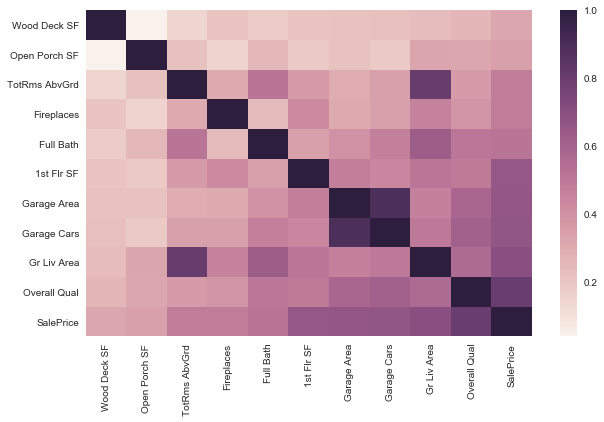

In [22]:
import seaborn as sns

plt.figure(figsize=(10,6))
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = train_subset[strong_corrs.index].corr()
sns.heatmap(corrmat)

#### Based on the correlation matrix heatmap, it can tell that the following pairs of columns are strongly correlated:

    •	Gr Liv Area and TotRms AbvGrd
    •	Garage Area and Garage Cars


## Train And Test Model

In [25]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
features = final_corr_cols.drop(['SalePrice']).index
target = 'SalePrice'

clean_test = test[final_corr_cols.index].dropna()

lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

34173.9762919
41032.0261202


## Removing Low Variance Features

Standardize all of the columns to vary between 0 and 1. Then, set a cutoff value for variance and remove features that have less than that variance amount.

(set a cutoff variance of 0.015)

In [26]:
unit_train = train[features]/(train[features].max())
sorted_vars = unit_train.var().sort_values()
print(sorted_vars)

Open Porch SF    0.013938
Gr Liv Area      0.018014
Full Bath        0.018621
1st Flr SF       0.019182
Overall Qual     0.019842
Garage Area      0.020347
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64


## Final Model

Remove the Open Porch SF feature, and train and test a model using the remaining features.

In [27]:
features = features.drop(['Open Porch SF'])

clean_test = test[final_corr_cols.index].dropna()

lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse_2 = np.sqrt(train_mse)
test_rmse_2 = np.sqrt(test_mse)

print(train_rmse_2)
print(test_rmse_2)

34372.6967078
40591.4270244


The Final Model able to improve the RMSE value to approximately 40591 by removing the Open Porch SF feature. This is most likely the furthest can go without transforming and utilizing the other features in the dataset.

# PROCESSING AND TRANSFORMING FEATURES

Some of the common issues include:

    •	the column is not numerical (e.g. a zoning code represented using text)
    •	the column is numerical but not ordinal (e.g. zip code values)
    •	the column is numerical but isn't representative of the type of relationship with the target column (e.g. year values)

#### Filtering the training set to just the columns containing no missing values.

In [28]:
ames = pd.read_csv('C:/Users/i7/csv/AmesHousing.txt', delimiter="\t")
train = ames[0:1460]
test = ames[1460:]

train_null_counts = train.isnull().sum()
print(train_null_counts)

df_no_mv = train[train_null_counts[train_null_counts==0].index]

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       249
Lot Area             0
Street               0
Alley             1351
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        11
Mas Vnr Area        11
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu       717
Garage Type         74
Garage Yr Blt       75
Garage Finish       75
Garage Cars          0
Garage Area          0
Garage Qual

In [29]:
df_no_mv

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,4920,Pave,Reg,Lvl,AllPub,Inside,...,170,0,0,0,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,5389,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,189000


In [30]:
df_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Area           1460 non-null int64
Street             1460 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         1460 non-null object
Roof Matl          1460 non-null object
Exterior 1st       14

## Categorical Features

Transform object into numerical representations. 

Select the Utilities column, return the categorical codes, and display the unique value counts for those codes

In [31]:
text_cols = df_no_mv.select_dtypes(include=['object']).columns

for col in text_cols:
    print(col+":", len(train[col].unique()))
    
for col in text_cols:
    train[col] = train[col].astype('category')
train['Utilities'].cat.codes.value_counts()

MS Zoning: 6
Street: 2
Lot Shape: 4
Land Contour: 4
Utilities: 3
Lot Config: 5
Land Slope: 3
Neighborhood: 26
Condition 1: 9
Condition 2: 6
Bldg Type: 5
House Style: 8
Roof Style: 6
Roof Matl: 5
Exterior 1st: 14
Exterior 2nd: 16
Exter Qual: 4
Exter Cond: 5
Foundation: 6
Heating: 6
Heating QC: 4
Central Air: 2
Electrical: 4
Kitchen Qual: 5
Functional: 7
Paved Drive: 3
Sale Type: 9
Sale Condition: 5


F:\ANACONDA\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0    1457
2       2
1       1
dtype: int64

## Dummy Coding

An increase in the Utilities column from 1 to 2 has no correlation value with the target column, and the categorical codes are instead used for uniqueness and exclusivity (the category associated with 0 is different than the one associated with 1).

The common solution is to use a technique called [dummy coding](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)

In [32]:
dummy_cols = pd.DataFrame()
for col in text_cols:
    col_dummies = pd.get_dummies(train[col])
    train = pd.concat([train, col_dummies], axis=1)
    del train[col]

## Transforming Improper Numerical Features

The two main issues with these features are:

    •	Year values aren't representative of how old a house is
    •	The Year Remod/Add column doesn't actually provide useful information for a linear regression model

In [33]:
train['years_until_remod'] = train['Year Remod/Add'] - train['Year Built']

## Missing Values

Two main approaches that can take:

    •	Remove rows containing missing values for specific columns
        o	Pro: Rows containing missing values are removed, leaving only clean data for modeling
        o	Con: Entire observations from the training set are removed, which can reduce overall prediction accuracy
    •	Impute (or replace) missing values using a descriptive statistic from the column
        o	Pro: Missing values are replaced with potentially similar estimates, preserving the rest of the observation in the model.
        o	Con: Depending on the approach, we may be adding noisy data for the model to learn

Given that we only have 1460 training examples (with ~80 potentially useful features), don't remove any of these rows from the dataset. Let's instead focus on imputation techniques.

#### focus on columns that contain at least 1 missing value but less than 365 missing values (or 25% of the number of rows in the training set). 

In [35]:
ames_2 = pd.read_csv('C:/Users/i7/csv/AmesHousing.txt', delimiter="\t")
train = ames_2[0:1460]
test = ames_2[1460:]

train_null_counts = train.isnull().sum()

df_missing_values = train[train_null_counts[(train_null_counts>0) & (train_null_counts<584)].index]

print(df_missing_values.isnull().sum())
print(df_missing_values.dtypes)

Lot Frontage      249
Mas Vnr Type       11
Mas Vnr Area       11
Bsmt Qual          40
Bsmt Cond          40
Bsmt Exposure      41
BsmtFin Type 1     40
BsmtFin SF 1        1
BsmtFin Type 2     41
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Type        74
Garage Yr Blt      75
Garage Finish      75
Garage Qual        75
Garage Cond        75
dtype: int64
Lot Frontage      float64
Mas Vnr Type       object
Mas Vnr Area      float64
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Garage Type        object
Garage Yr Blt     float64
Garage Finish      object
Garage Qual        object
Garage Cond        object
dtype: object


## Imputing Missing Values

In [36]:
float_cols = df_missing_values.select_dtypes(include=['float'])

float_cols = float_cols.fillna(df_missing_values.mean())

print(float_cols.isnull().sum())


Lot Frontage      0
Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Garage Yr Blt     0
dtype: int64
